In [30]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [27]:
#import and explore dataset
df = pd.read_csv("./house_data.csv")
print(df.head())
print(df.describe())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [3]:

columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [4]:

#encode the column data
le = LabelEncoder()
df[columns] = df[columns].apply(le.fit_transform)


<Axes: >

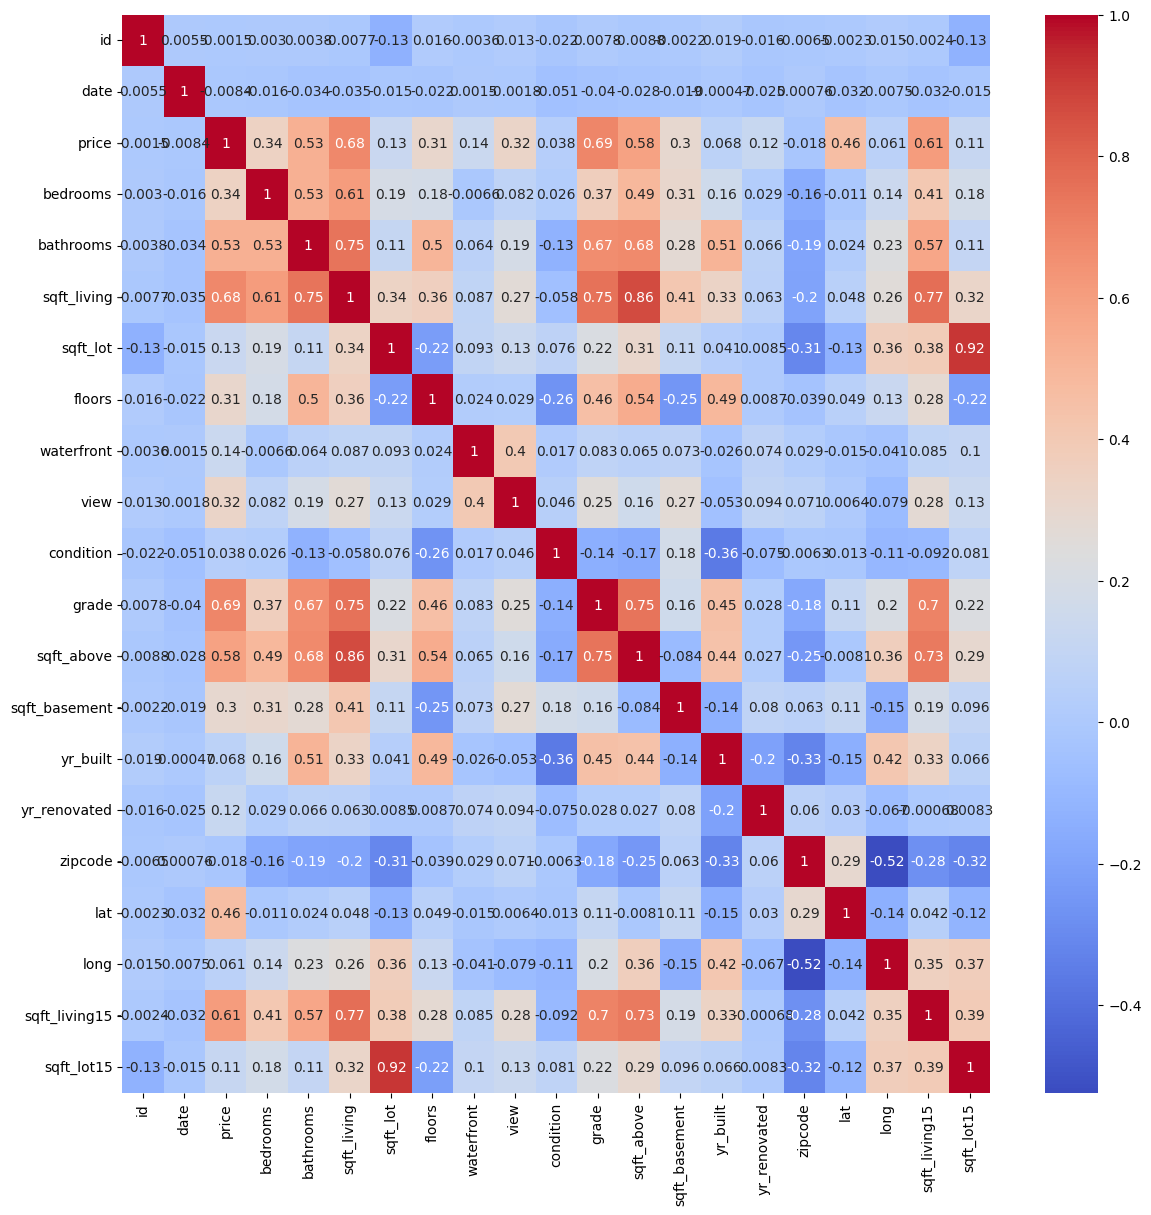

In [11]:

correlation = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation,cmap = 'coolwarm',annot=True)

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15339,164,349,3,3,109,2535,0,0,0,...,5,123,0,55,0,66,2398,223,109,2164
1,14466,220,2091,3,8,506,3578,2,0,0,...,5,395,56,51,45,55,4478,161,208,3470
2,13503,290,180,2,3,39,5520,0,0,0,...,4,40,0,33,0,16,4647,247,491,3804
3,6371,220,2373,4,11,316,2125,0,0,0,...,5,89,131,65,0,58,2492,87,116,1748
4,4955,283,1967,3,7,238,4209,0,0,0,...,6,255,0,87,0,37,3439,435,235,3357


In [18]:
y = df['price']
x=df.drop(['price'],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=83,test_size=0.2)

In [19]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [21]:
ypred = model.predict(xtest)
ypred

array([1358.35789497, 2924.52828128,  517.50277128, ..., 1734.96716851,
       -698.65396299, 1783.97745159])

In [24]:
score = r2_score(ytest,ypred)
score

0.7728722870254012

In [28]:
print(model.intercept_)

-1168.7860211690008


In [29]:
model.coef_

array([-1.49944559e-03,  3.73269990e-01, -4.40952526e+01,  2.07966139e+01,
        2.61852069e+00, -6.70277263e-03,  4.79568918e+01,  4.45997511e+02,
        1.10273687e+02,  1.23005345e+02,  3.01706274e+02, -1.20164238e+00,
       -2.27210516e+00, -7.17470313e+00,  3.54380443e+00, -3.28947580e+00,
        2.86859016e-01,  4.24034870e-03,  9.25895147e-01, -3.32892863e-02])

In [31]:
print('Mean Absolute Error:', mean_absolute_error(ytest, ypred))
print('Mean Squared Error:', mean_squared_error(ytest, ypred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, ypred)))

Mean Absolute Error: 379.4176979939807
Mean Squared Error: 232782.00336065012
Root Mean Squared Error: 482.4748732946102
